<a href="https://colab.research.google.com/github/reeruryu/DLCV/blob/main/D10_yolov3_train_blackpink_tmp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Yolo v3 다운로드 및 설치

In [1]:
!git clone https://github.com/ultralytics/yolov3
!cd yolov3;pip install -qr requirements.txt

Cloning into 'yolov3'...
remote: Enumerating objects: 10029, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 10029 (delta 3), reused 9 (delta 3), pack-reused 10017
Receiving objects: 100% (10029/10029), 9.36 MiB | 10.10 MiB/s, done.
Resolving deltas: 100% (6762/6762), done.
     |████████████████████████████████| 596 kB 32.4 MB/s 
     |████████████████████████████████| 1.8 MB 55.8 MB/s 
     |████████████████████████████████| 181 kB 30.3 MB/s 
     |████████████████████████████████| 147 kB 58.2 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 


In [2]:
!wget -O blackpink.zip https://github.com/reeruryu/DLCV/blob/main/blackpink.zip?raw=true
!mkdir /content/blackpink
!unzip blackpink.zip -d /content/blackpink

--2022-07-20 11:04:25--  https://github.com/reeruryu/DLCV/blob/main/blackpink.zip?raw=true
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/reeruryu/DLCV/raw/main/blackpink.zip [following]
--2022-07-20 11:04:25--  https://github.com/reeruryu/DLCV/raw/main/blackpink.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/reeruryu/DLCV/main/blackpink.zip [following]
--2022-07-20 11:04:26--  https://raw.githubusercontent.com/reeruryu/DLCV/main/blackpink.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3399837 (3.2M) [ap

### Dataset용 yaml 파일을 생성하고 학습 수행


In [3]:
!wget -O /content/blackpink/blackpink.yaml https://raw.githubusercontent.com/reeruryu/DLCV/main/blackpink.yaml

--2022-07-20 11:04:41--  https://raw.githubusercontent.com/reeruryu/DLCV/main/blackpink.yaml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 165 [text/plain]
Saving to: ‘/content/blackpink/blackpink.yaml’

/content/blackpink/ 100%[===================>]     165  --.-KB/s    in 0s      

2022-07-20 11:04:42 (4.71 MB/s) - ‘/content/blackpink/blackpink.yaml’ saved [165/165]



In [4]:
# Google Drive 접근을 위한 Mount 적용. 
import os, sys 
from google.colab import drive 

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
# soft link로 Google Drive Directory 연결. 
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive
# Google Drive 밑에 Directory 생성. 이미 생성 되어 있을 시 오류 발생. 
!mkdir "/mydrive/ultra_workdir_blackpink"

'제목 없는 문서 (1).gdoc'	 '제목 없는 문서.gdoc'
'제목 없는 문서 (2).gdoc'	 'My Drive'
'8기_코딩테스트_류희주 (1).txt'   pet_work_dir
 8기_코딩테스트_류희주.txt	  ultra_workdir
'Colab Notebooks'		  ultra_workdir_blackpink
mkdir: cannot create directory ‘/mydrive/ultra_workdir_blackpink’: File exists


In [6]:
###  batch size는 8로 정할것. 16으로 설정시 성능이 좋아지지 않음. epoch는 150번으로 설정.    
!cd /content/yolov3; python train.py --img 640 --batch 8 --epochs 150 --data /content/blackpink/blackpink.yaml --weights yolov3.pt \
                                     --project=/mydrive/ultra_workdir_blackpink --name blackpink --exist-ok 

wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=yolov3.pt, cfg=, data=/content/blackpink/blackpink.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=150, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=/mydrive/ultra_workdir_blackpink, name=blackpink, exist_ok=True, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov3 ✅
YOLOv3 🚀 v9.6.0-21-g92c3bd7 torch 1.12.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weig

In [ ]:
!

### 단일 이미지 및 Video inference 수행 

In [9]:
# image 파일 inference 
!cd /content/yolov3;python detect.py --source /content/blackpink/images/train/00001.jpg \
                            --weights /mydrive/ultra_workdir_blackpink/blackpink/weights/best.pt --conf 0.3 \
                            --project=/content/data/output --name=run_image --exist-ok --line-thickness 2

detect: weights=['/mydrive/ultra_workdir_blackpink/blackpink/weights/best.pt'], source=/content/blackpink/images/train/00001.jpg, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/data/output, name=run_image, exist_ok=True, line_thickness=2, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv3 🚀 v9.6.0-21-g92c3bd7 torch 1.12.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model Summary: 261 layers, 61513585 parameters, 0 gradients, 154.6 GFLOPs
image 1/1 /content/blackpink/images/train/00001.jpg: 448x640 2 jennies, 1 rose, 1 lisa, Done. (0.052s)
Speed: 0.5ms pre-process, 52.4ms inference, 1.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to /content/data/output/run_image


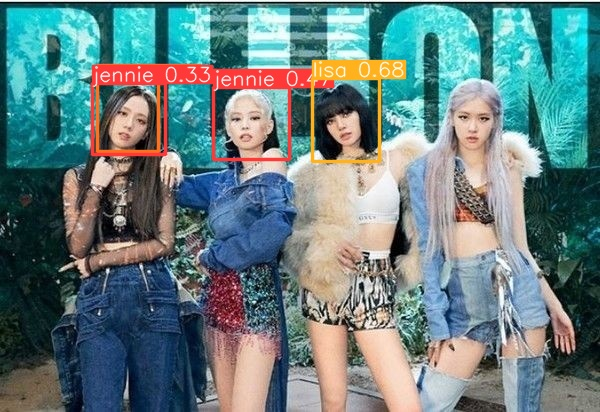

In [10]:
from IPython.display import Image, clear_output 

Image(filename='/content/data/output/run_image/00001.jpg', width=800)

In [ ]:
!wget -O /content/incredibles/incredibles.mp4 https://github.com/chulminkw/DLCV/blob/master/data/video/incredibles.mp4?raw=true

In [ ]:
!cd /content/yolov3;python detect.py --source /content/incredibles/incredibles.mp4 \
                            --weights /mydrive/ultra_workdir/incredibles/weights/best.pt --conf 0.3 \
                            --project=/content/data/output --name=run_image --exist-ok --line-thickness 2